In [ ]:
# Cecillia Cherish Mardjuki
# 825220090

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file = "titanicFull.csv"
df = pd.read_csv(file)
# mengimport library

In [3]:
df.head(4)
# menampilkan data 4 teratas

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S


In [5]:
df.iloc[-6:]
# menampilkan baris dari 6 terakhir kebawah

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S


In [7]:
df.info()
# menampilkan infonya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [9]:
df.shape
# menampilkan jumlah kolom dan baris

(1309, 11)

In [10]:
df.columns
# menampilkan kolom yang ada

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [12]:
df.rename(index=str,
columns={"pclass":"ticketClass",
         "sibsp":"siblingsSpouses",
         "parch":"parentsChildren"}, inplace=True)

df.columns
# menampilkan nama kolom

# mengganti nama kolom yang ada dengan nama kolom yang baru

Index(['ticketClass', 'survived', 'name', 'sex', 'age', 'siblingsSpouses',
       'parentsChildren', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [60]:
duplicated = df.duplicated().sum()
print("There are %d duplicated records" % (duplicated))
# menjumlahkan data yang dupilkat/dobel kedalam variable duplicated
# lalu mencetak jumlah data yang duplikat

There are 0 duplicated records


In [15]:
dff = df.copy()
# membuat duplikat dari data set df, ke variable dff

In [17]:
# Tampilkan missing data and urutkan dalam urutan secara ascending (naik)
missingDataSummary = dff.isna().sum()

In [61]:
missingDataPercentage = (dff.isnull().sum()/dff.shape[0])
# menghitung persentase data yang hilang dalam setiap kolom data frame dff

In [21]:
missingData = pd.concat([missingDataSummary, missingDataPercentage],
                        axis=1, keys=['Missing', 'Percentage'])
# menggabungkan kedua data frame menggunakan concat
# diberi label kolom Missing, Percentage

In [22]:
missingData.sort_values(ascending=False, by='Missing')
# mengurutkan data Missing dari yang terbesar

,Missing,Percentage
cabin,1014,0.774637
age,263,0.200917
embarked,2,0.001528
fare,1,0.000764
ticketClass,0,0.000000
survived,0,0.000000
name,0,0.000000
sex,0,0.000000
siblingsSpouses,0,0.000000
parentsChildren,0,0.000000


In [24]:
dffClean = dff.drop(columns='cabin')
# menghapus kolom cabin

dffClean.isna().sum().sort_values(ascending=False)
# mengambil dari yang terbesar karena descending, disini di gambungkan lalu diurutkan dari yang terbesar

age                263
embarked             2
fare                 1
ticketClass          0
survived             0
name                 0
sex                  0
siblingsSpouses      0
parentsChildren      0
ticket               0
dtype: int64

In [26]:
# menampilkan info dari dffClean
dffClean.info()
dff.isna().sum() # menghitung jumlah nilai yang hilang
dffClean[dffClean['embarked'].isna()]
# mencari baris dari data frame dffClean kolom embbarked memiliki data yang hilang/null

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticketClass      1309 non-null   int64  
 1   survived         1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1046 non-null   float64
 5   siblingsSpouses  1309 non-null   int64  
 6   parentsChildren  1309 non-null   int64  
 7   ticket           1309 non-null   object 
 8   fare             1308 non-null   float64
 9   embarked         1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 144.8+ KB


,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [31]:
dffClean['embarked'] = dffClean['embarked'].fillna(dffClean['embarked'].mode()[0])
# mengisi nilai yang null dengan nilai yang paling sering muncul

dffClean.isna().sum().sort_values(ascending=False)
#  mengurutkan dari terbesar, descending

age                263
fare                 1
ticketClass          0
survived             0
name                 0
sex                  0
siblingsSpouses      0
parentsChildren      0
ticket               0
embarked             0
dtype: int64

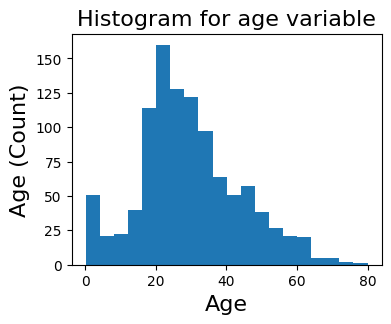

In [33]:
plt.figure(figsize=(4,3), dpi=100)
ax = dffClean['age'].hist(bins=20)
ax.set_title("Histogram for age variable",fontsize=16) # untuk title
ax.set_xlabel('Age', fontsize=16) # untuk sumbu x
ax.set_ylabel('Age (Count)', fontsize=16, rotation=90) # untuk sumbu y
ax.grid(False) # tidak menggunakan grid/garis
# untuk menampilkan histogram, menggunakan pandas

Text(0, 0.5, 'Age (Count)')

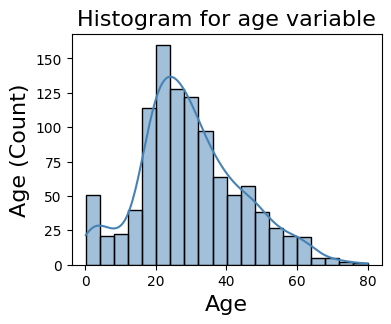

In [41]:
# Menampilkan histogram untuk age variable menggunakan seaborn
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(dffClean, x='age', kde=True, color='steelblue', bins=20) # kde : untuk garis alur histogram
g.set_title("Histogram for age variable",fontsize=16) # untuk title
g.set_xlabel('Age', fontsize=16) # untuk sumbu x
g.set_ylabel('Age (Count)', fontsize=16, rotation=90) # untuk sumbu y

Text(0, 0.5, 'Age (Count)')

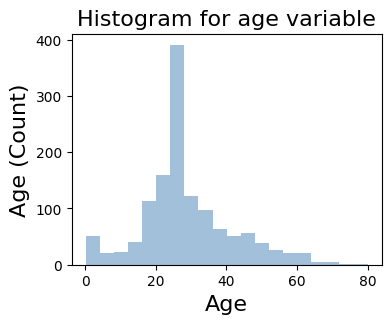

In [62]:
# Menggunakan matplotlib
plt.figure(figsize=(4,3), dpi=100) # ukuran
plt.hist(dffClean['age'], bins=20, alpha=0.5, density=False,
         histtype='stepfilled', color='steelblue', edgecolor='none') # tipe histogram

# alpha=0.5 untuk tingkat transparent
plt.title("Histogram for age variable",fontsize=16) # untuk title
plt.xlabel('Age',fontsize=16) # untuk sumbu x
plt.ylabel('Age (Count)',fontsize=16,rotation=90) # untuk sumbu y label

In [45]:
dffClean.info()
# menampilkan info dari dffClean
dff.isna().sum() # menghitung jumlah nilai yang hilang dari setiap kolom
dffClean[dffClean['age'].isna()] # menampilkan baris data frame dffClean yang kolom age null
dffClean['age'] = dffClean['age'].fillna(dffClean['age'].median()) # mengisi nilai null dengan nilai median dari kolom tersebut
dffClean.isna().sum().sort_values(ascending=False)
#  mengisi missing value, dengan age yang terbanyak mucul rata rata

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticketClass      1309 non-null   int64  
 1   survived         1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1309 non-null   float64
 5   siblingsSpouses  1309 non-null   int64  
 6   parentsChildren  1309 non-null   int64  
 7   ticket           1309 non-null   object 
 8   fare             1308 non-null   float64
 9   embarked         1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 144.8+ KB


fare               1
ticketClass        0
survived           0
name               0
sex                0
age                0
siblingsSpouses    0
parentsChildren    0
ticket             0
embarked           0
dtype: int64

Text(0, 0.5, 'Age (Count))')

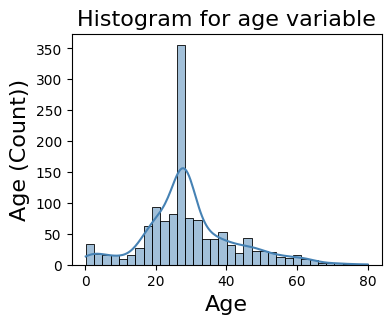

In [59]:
# menampilkan histogramuntuk age variable menggunakan seaborn
plt.figure(figsize=(4,3), dpi=100) {# ukuran}
g = sns.histplot(dffClean, x='age', kde=True, color='steelblue') # untuk tipe histogram
g.set_title("Histogram for age variable",fontsize=16) # untuk title
g.set_xlabel('Age', fontsize=16) # untuk sumbu x
g.set_ylabel('Age (Count))', fontsize=16, rotation=90) # untuk sumbu y

In [47]:
# Pilih strategi imputasi terbaik dan terapkan
dffClean[dffClean['fare'].isna()]

,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [50]:
dffClean['ticketClass'].unique()
# menampilkan nilai unik dalam kolom ticketClass

array([1, 2, 3])

In [51]:
ticketClass = dffClean[dffClean['fare'].isna()]['ticketClass']
# memeriksa nilai yang hilang dalam kolom fare
if (len(ticketClass)>0):
  fareMedian = dffClean[dffClean['ticketClass']==ticketClass[0]]['fare'].median()
# menghitung nilai median fare yang sama dengan tiketClass

  dffClean['fare'] = dffClean['fare'].fillna(fareMedian)
# menisi data yang koso

dffClean.isna().sum().sort_values(ascending=False)
# menggabungkan data dan mengurutkan

# isna untuk mengganti nilai yang null ke nol
# isnull untuk mengganti nilai yang nol ke null
# embark untuk mengganti nilai null ke nilai yang sering muncul

ticketClass        0
survived           0
name               0
sex                0
age                0
siblingsSpouses    0
parentsChildren    0
ticket             0
fare               0
embarked           0
dtype: int64

In [58]:
file = "titanicClean.csv"
dffClean.to_csv(file, index=False)
# memasukan data farme dffClean kedalam file csv titanicClean
# index tidak termasuk

In [57]:
titanicClean = pd.read_csv(file)
titanicClean.info()
#  menampilkan info isi data set titanicClean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticketClass      1309 non-null   int64  
 1   survived         1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1309 non-null   float64
 5   siblingsSpouses  1309 non-null   int64  
 6   parentsChildren  1309 non-null   int64  
 7   ticket           1309 non-null   object 
 8   fare             1309 non-null   float64
 9   embarked         1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [56]:
titanicClean[['survived', 'age', 'siblingsSpouses', 'parentsChildren', 'fare']].describe()
# menjelaskan/menampilkan kolom dari yang disebutkan diatas

,survived,age,siblingsSpouses,parentsChildren,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,29.503186,0.498854,0.385027,33.276193
std,0.486055,12.905241,1.041658,0.865560,51.743584
min,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,80.000000,8.000000,9.000000,512.329200
